In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import folium as fo
import plotly as ply
import plotly.graph_objects as go
import matplotlib

from matplotlib.gridspec import GridSpec
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib

In [ ]:
colors_pr = [#'#3cb44b',green for land use
    'gray',
    'orange',
    'blue',
    'brown'
          ]

primary_cm = ListedColormap(colors_pr, name='my_colormap')

In [3]:
p_s = pd.read_excel("trn_fuel_0821_80p.xlsx", sheet_name='stick').iloc[:, :18]
p_2030nl = pd.read_excel("trn_fuel_0821_80p.xlsx", sheet_name='2030nl').iloc[:, :18]
p_2030l = pd.read_excel("trn_fuel_0821_80p.xlsx", sheet_name='2030l').iloc[:, :18]
p_2040nl = pd.read_excel("trn_fuel_0821_80p.xlsx", sheet_name='2040nl').iloc[:, :18]
p_2040l = pd.read_excel("trn_fuel_0821_80p.xlsx", sheet_name='2040l').iloc[:, :18]

# f_s = pd.read_excel("final_energy_0226_100p.xlsx", sheet_name='stick').iloc[:, :14]
# f_2030nl = pd.read_excel("final_energy_0226_100p.xlsx", sheet_name='2030_nl').iloc[:, :14]
# f_2030l = pd.read_excel("final_energy_0226_100p.xlsx", sheet_name='2030_l').iloc[:, :14]
# f_2040nl = pd.read_excel("final_energy_0226_100p.xlsx", sheet_name='2040_nl').iloc[:, :14]
# f_2040l = pd.read_excel("final_energy_0226_100p.xlsx", sheet_name='2040_l').iloc[:, :14]

In [4]:
all_p=[p_s, p_2030nl, p_2030l, p_2040nl, p_2040l]

In [5]:
def primary(df):
    all_p = df['fuel'].unique()
    all_p
    p_order = ['refined liquids enduse', 'elect_td_trn', 'delivered gas',
              'H2 retail dispensing', 'H2 wholesale dispensing'
              ]
    # sum them all
    plot_x = pd.DataFrame()
    name = 'Stick'
    for pr in p_order:
        filtered_df = df[df['fuel'] == pr]
        sum_by_columns = filtered_df[['i2015', 'i2020', 'i2025', 'i2030', 'i2035', 'i2040',
                                     'i2045', 'i2050']].sum(axis=0)
        plot_x[pr] = sum_by_columns
    # plot_x

    # add all oil, gas, coal
    plot_x['H2'] = plot_x['H2 wholesale dispensing'] + plot_x['H2 retail dispensing']

    plot_x = plot_x.drop(['H2 retail dispensing', 'H2 wholesale dispensing'], axis=1)
    pr_order = ['refined liquids enduse', 'elect_td_trn', 'delivered gas','H2'
              ]

    plot_x = plot_x.reindex(columns=pr_order)
    return(plot_x)

In [6]:
all_p_processed = [primary(df) for df in all_p]
np_s = all_p_processed[0]
np_30nl = all_p_processed[1]
np_30l = all_p_processed[2]
np_40nl = all_p_processed[3]
np_40l = all_p_processed[4]

years = ['2015', '2020', '2025', '2030', '2035','2040', '2045', '2050']
np_s.index = years
np_30nl.index = years
np_30l.index = years
np_40nl.index = years
np_40l.index = years

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


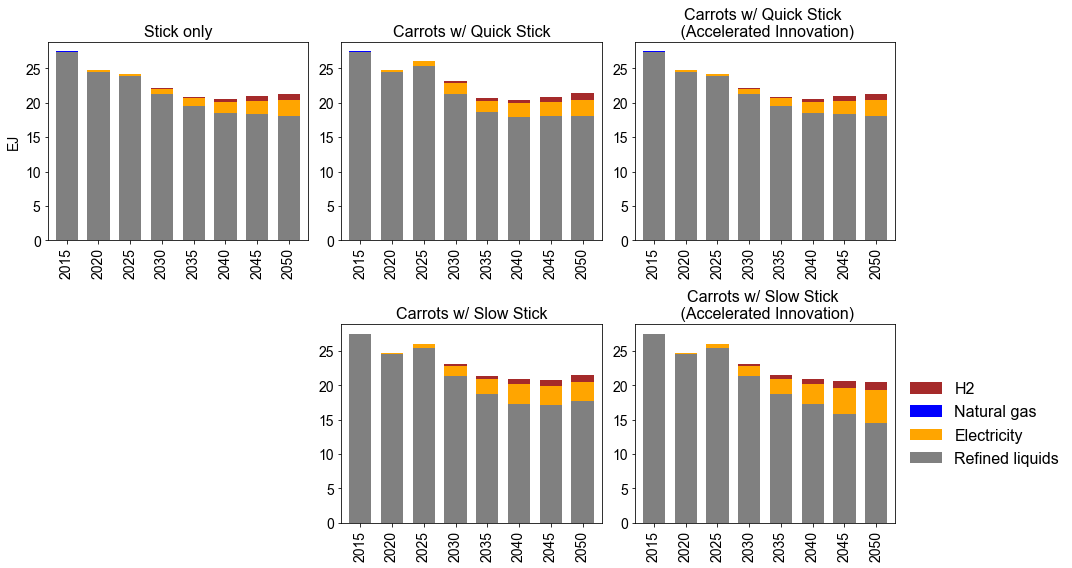

In [ ]:
mpl.rcParams['font.family'] = 'Arial'

fig, axs = plt.subplots(2, 3, figsize=(15, 8), gridspec_kw={'width_ratios': [1, 1, 1], 'height_ratios': [1, 1]})

# plt.suptitle("Transportation final energy consumption 2015~2050", fontsize=18)

axs[1, 0].axis('off')

np_s.plot(kind='bar', stacked=True, ax=axs[0, 0], cmap=primary_cm, width=0.7)
np_30nl.plot(kind='bar', stacked=True, ax=axs[0, 1], cmap=primary_cm, width=0.7)
np_30l.plot(kind='bar', stacked=True, ax=axs[0, 2], cmap=primary_cm, width=0.7)
np_40nl.plot(kind='bar', stacked=True, ax=axs[1, 1], cmap=primary_cm, width=0.7)
np_40l.plot(kind='bar', stacked=True, ax=axs[1, 2], cmap=primary_cm, width=0.7)

for ax in axs.flat:
    ax.legend().remove()
#     ax.set_ylim(-150, 0)
    ax.tick_params(axis='both', which='major', labelsize=14)

axs[0, 0].set_title('Stick only', fontsize=16)
axs[0, 0].set_ylabel('EJ', fontsize=14)

axs[0, 1].set_title('Carrots w/ Quick Stick', fontsize=16)
axs[0, 2].set_title('Carrots w/ Quick Stick \n (Accelerated Innovation)', fontsize=16)
axs[1, 1].set_title('Carrots w/ Slow Stick', fontsize=16)
axs[1, 2].set_title('Carrots w/ Slow Stick \n (Accelerated Innovation)', fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=16)

# Dictionary for replacements
replacements = {
    "delivered gas": "Natural gas",
    "elect_td_trn": "Electricity",
    "refined liquids enduse": "Refined liquids"
}

# Capture handles and labels, and apply replacements
handles, labels = axs[0, 0].get_legend_handles_labels()  # or any other subplot with plotted data
for i, label in enumerate(labels):
    for old, new in replacements.items():
        labels[i] = labels[i].replace(old, new)

# Add a global legend with modified labels in reverse order
plt.legend(handles[::-1], labels[::-1], loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=16)

# Adjust layout and display plot
plt.tight_layout()
plt.show()


In [8]:
# if we only plot ldv-4w:
p_s2 = pd.read_excel("trn_fuel_0821_80p.xlsx", sheet_name='stick').iloc[:, :18]
p_2030nl2 = pd.read_excel("trn_fuel_0821_80p.xlsx", sheet_name='2030nl').iloc[:, :18]
p_2030l2 = pd.read_excel("trn_fuel_0821_80p.xlsx", sheet_name='2030l').iloc[:, :18]
p_2040nl2 = pd.read_excel("trn_fuel_0821_80p.xlsx", sheet_name='2040nl').iloc[:, :18]
p_2040l2 = pd.read_excel("trn_fuel_0821_80p.xlsx", sheet_name='2040l').iloc[:, :18]

# only plotting cars
p_s2 = p_s2[p_s2['mode'] == 'Car']
p_2030nl2 = p_2030nl2[p_2030nl2['mode'] == 'Car']
p_2030l2 = p_2030l2[p_2030l2['mode'] == 'Car']
p_2040nl2 = p_2040nl2[p_2040nl2['mode'] == 'Car']
p_2040l2 = p_2040l2[p_2040l2['mode'] == 'Car']

In [9]:
df = p_2040nl2
all_p = df['fuel'].unique()
all_p
p_order = ['refined liquids enduse', 'elect_td_trn', 'delivered gas',
          'H2 retail dispensing', 'H2 wholesale dispensing'
          ]
# sum them all
plot_x = pd.DataFrame()
name = 'Stick'
for pr in p_order:
    filtered_df = df[df['fuel'] == pr]
    sum_by_columns = filtered_df[['i2015', 'i2020', 'i2025', 'i2030', 'i2035'
                                  ,'i2040',
#                                  'i2045', 'i2050'
                                 ]].sum(axis=0)
    plot_x[pr] = sum_by_columns
# plot_x

# add all oil, gas, coal
plot_x['H2'] = plot_x['H2 wholesale dispensing'] + plot_x['H2 retail dispensing']

plot_x = plot_x.drop(['H2 retail dispensing', 'H2 wholesale dispensing'], axis=1)
pr_order = ['refined liquids enduse', 'elect_td_trn', 'delivered gas','H2'
          ]

plot_x = plot_x.reindex(columns=pr_order)
plot_x
#     return(plot_x)

,refined liquids enduse,elect_td_trn,delivered gas,H2
i2015,5.665425,0.000000,0.0,0.000000
i2020,4.873661,0.001323,0.0,0.000062
i2025,4.646695,0.147778,0.0,0.012987
i2030,3.554022,0.543586,0.0,0.116659
i2035,2.774785,0.763158,0.0,0.178187
i2040,2.084274,0.991399,0.0,0.267701


In [10]:
all_p2=[p_s2, p_2030nl2, p_2030l2, p_2040nl2, p_2040l2]
all_p_processed2 = [primary(df) for df in all_p2]
np_s2 = all_p_processed2[0]
np_30nl2 = all_p_processed2[1]
np_30l2 = all_p_processed2[2]
np_40nl2 = all_p_processed2[3]
np_40l2 = all_p_processed2[4]

# years = ['2015', '2020', '2025', '2030', '2035','2040', '2045', '2050']
np_s2.index = years
np_30nl2.index = years
np_30l2.index = years
np_40nl2.index = years
np_40l2.index = years

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


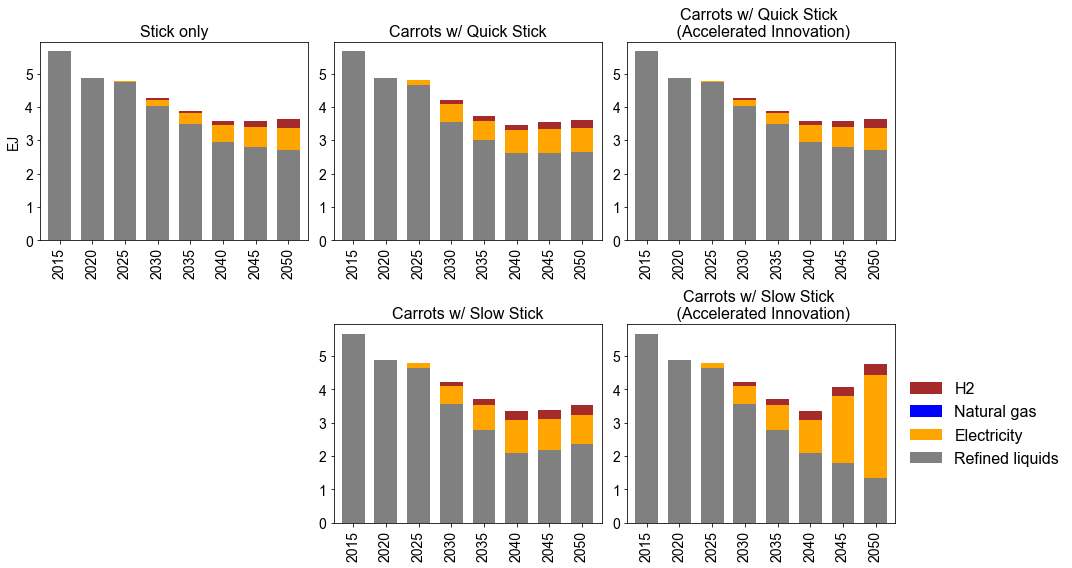

In [ ]:
mpl.rcParams['font.family'] = 'Arial'
fig, axs = plt.subplots(2, 3, figsize=(15, 8), gridspec_kw={'width_ratios': [1, 1, 1], 'height_ratios': [1, 1]})

# plt.suptitle("Transportation final energy consumption 2015~2050, Cars", fontsize=18)
axs[1, 0].axis('off')
np_s2.plot(kind='bar', stacked=True, ax=axs[0, 0], cmap=primary_cm, width=0.7)
np_30nl2.plot(kind='bar', stacked=True, ax=axs[0, 1], cmap=primary_cm, width=0.7)
np_30l2.plot(kind='bar', stacked=True, ax=axs[0, 2], cmap=primary_cm, width=0.7)
np_40nl2.plot(kind='bar', stacked=True, ax=axs[1, 1], cmap=primary_cm, width=0.7)
np_40l2.plot(kind='bar', stacked=True, ax=axs[1, 2], cmap=primary_cm, width=0.7)

for ax in axs.flat:
    ax.legend().remove()
#     ax.set_ylim(-150, 0)
    ax.tick_params(axis='both', which='major', labelsize=14)


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=16)

axs[0, 0].set_title('Stick only', fontsize=16)
axs[0, 0].set_ylabel('EJ', fontsize=14)

axs[0, 1].set_title('Carrots w/ Quick Stick', fontsize=16)
axs[0, 2].set_title('Carrots w/ Quick Stick \n (Accelerated Innovation)', fontsize=16)
axs[1, 1].set_title('Carrots w/ Slow Stick', fontsize=16)
axs[1, 2].set_title('Carrots w/ Slow Stick \n (Accelerated Innovation)', fontsize=16)

# Dictionary for replacements
replacements = {
    "delivered gas": "Natural gas",
    "elect_td_trn": "Electricity",
    "refined liquids enduse": "Refined liquids"
}

# Capture handles and labels, and apply replacements
handles, labels = axs[0, 0].get_legend_handles_labels()  # or any other subplot with plotted data
for i, label in enumerate(labels):
    for old, new in replacements.items():
        labels[i] = labels[i].replace(old, new)

# Add a global legend with modified labels in reverse order
plt.legend(handles[::-1], labels[::-1], loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=16)
plt.tight_layout()
plt.show()
